In [88]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
import math
from sklearn import metrics
from sklearn.metrics import mutual_info_score
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.dummy import DummyClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

In [62]:
data = pd.read_csv(r'C:\Users\divya\Downloads\2010-2011 Solar home electricity data.csv')  # Replace 'your_dataset.csv' with the actual file path


In [63]:
data = data.drop(["Customer", "Generator Capacity", "Postcode"], axis=1)

data['date'] = pd.to_datetime(data['date'])

print(data.isnull().sum())


Consumption Category    0
date                    0
0:30                    0
1:00                    0
1:30                    0
2:00                    0
2:30                    0
3:00                    0
3:30                    0
4:00                    0
4:30                    0
5:00                    0
5:30                    0
6:00                    0
6:30                    0
7:00                    0
7:30                    0
8:00                    0
8:30                    0
9:00                    0
9:30                    0
10:00                   0
10:30                   0
11:00                   0
11:30                   0
12:00                   0
12:30                   0
13:00                   0
13:30                   0
14:00                   0
14:30                   0
15:00                   0
15:30                   0
16:00                   0
16:30                   0
17:00                   0
17:30                   0
18:00                   0
18:30       

In [68]:
data

,Consumption Category,date,0:30,1:00,1:30,2:00,2:30,3:00,3:30,4:00,...,20:00,20:30,21:00,21:30,22:00,22:30,23:00,23:30,0:00,Consumption
0,GC,2010-07-01,0.303,0.471,0.083,0.121,0.361,0.079,0.122,0.098,...,0.540,0.406,0.543,0.495,0.216,0.378,0.128,0.078,0.125,31.984
1,CL,2010-07-01,1.250,1.244,1.256,0.744,0.019,1.250,0.069,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.075,7.945
2,GG,2010-07-01,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,10.020
3,GC,2010-07-02,0.116,0.346,0.122,0.079,0.120,0.107,0.343,0.120,...,1.100,1.012,0.817,0.526,0.335,0.402,0.142,0.120,0.111,27.166
4,CL,2010-07-02,1.238,1.238,1.256,1.250,0.169,0.594,0.688,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.088,8.646
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
269730,CL,2011-06-29,2.136,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,2.490,9.149
269731,GG,2011-06-29,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,4.839
269732,GC,2011-06-30,1.306,0.851,0.113,0.151,0.104,0.149,0.112,0.130,...,0.917,0.872,0.832,0.863,0.789,0.280,0.224,0.259,0.774,23.468
269733,CL,2011-06-30,0.904,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,2.528,8.581


In [67]:
time_period_value_gc = data.iloc[:, 2:51].sum(axis=1)
data['Consumption'] = time_period_value_gc

**How has energy consumption evolved over time in each consumption category?**

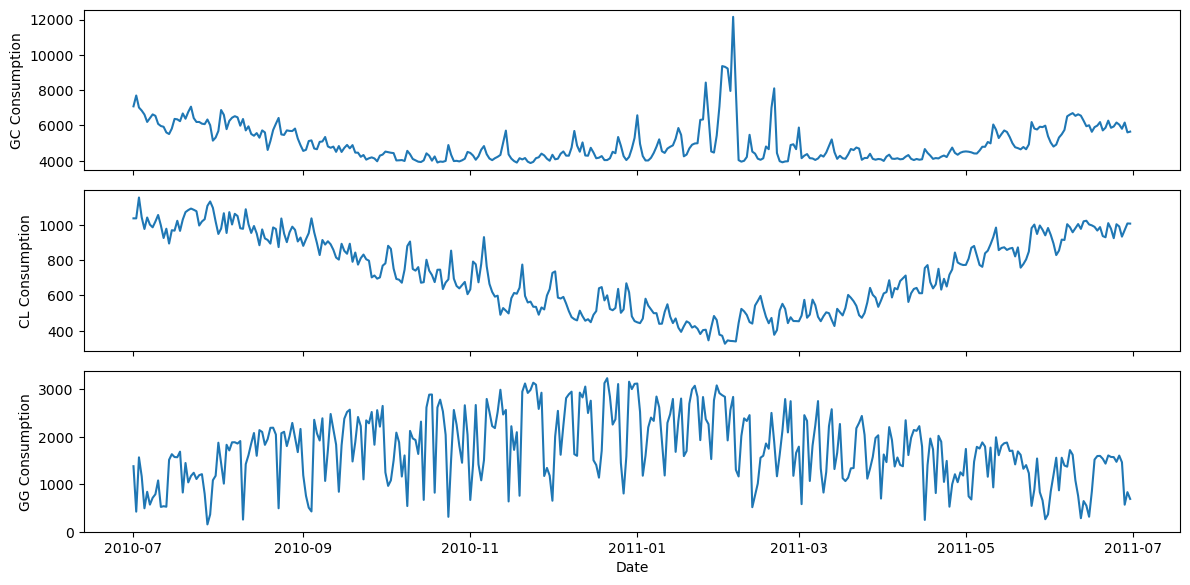

In [69]:
import matplotlib.pyplot as plt

category_consumption = data.groupby(['Consumption Category', 'date']).sum().reset_index()

fig, axes = plt.subplots(len(data['Consumption Category'].unique()), 1, figsize=(12, 6), sharex=True)
for i, category in enumerate(data['Consumption Category'].unique()):
    category_data = category_consumption[category_consumption['Consumption Category'] == category]
    axes[i].plot(category_data['date'], category_data['Consumption'])
    axes[i].set_ylabel(f'{category} Consumption')
plt.xlabel('Date')
plt.tight_layout()
plt.show()

**Are there any noticeable seasonal patterns or trends in energy consumption within different consumption categories?**

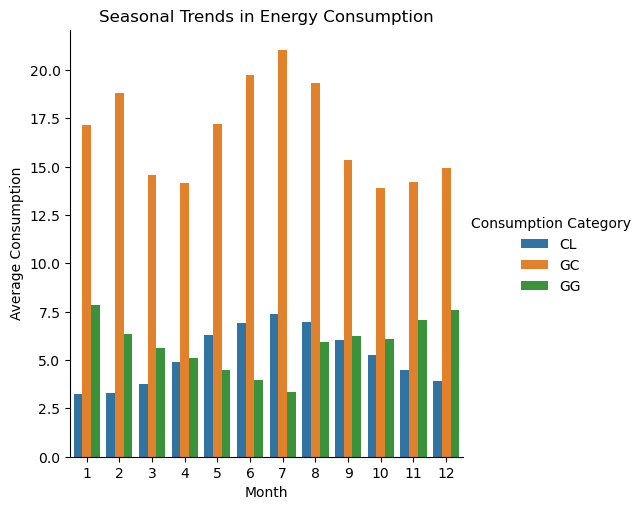

In [71]:
import seaborn as sns

# Extract month and year from the 'Date' column
data['Month'] = data['date'].dt.month
data['Year'] = data['date'].dt.year

# Group data by Consumption Category, Year, and Month, and calculate the average consumption
monthly_avg_consumption = data.groupby(['Consumption Category', 'Year', 'Month']).mean().reset_index()

# Plot seasonal trends in energy consumption for each category
sns.catplot(x='Month', y='Consumption', hue='Consumption Category', data=monthly_avg_consumption, kind='bar')
plt.xlabel('Month')
plt.ylabel('Average Consumption')
plt.title('Seasonal Trends in Energy Consumption')
plt.show()

In [41]:
# time_period_value_gc = data.iloc[:, 5:53].sum(axis=1)
# data['Time Period'] = time_period_value_gc

**Predict future energy consumption trend within each consumption category?**

In [73]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error

In [128]:
X = data.drop(['Consumption Category', 'date'], axis=1)
y = data['Consumption']

In [129]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [130]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [135]:
print('Intercept: ', model.intercept_)
list(zip(X, model.coef_))

Intercept:  -7.389644451905042e-13


[('0:30', 0.18339399739577286),
 ('1:00', 0.18339399739578388),
 ('1:30', 0.18339399739576037),
 ('2:00', 0.1833939973957801),
 ('2:30', 0.18339399739580295),
 ('3:00', 0.18339399739576062),
 ('3:30', 0.18339399739578183),
 ('4:00', 0.18339399739574724),
 ('4:30', 0.18339399739578843),
 ('5:00', 0.18339399739577272),
 ('5:30', 0.18339399739577383),
 ('6:00', 0.18339399739577328),
 ('6:30', 0.18339399739576584),
 ('7:00', 0.1833939973957815),
 ('7:30', 0.18339399739576323),
 ('8:00', 0.18339399739577306),
 ('8:30', 0.1833939973957942),
 ('9:00', 0.18339399739577636),
 ('9:30', 0.18339399739576417),
 ('10:00', 0.1833939973957685),
 ('10:30', 0.18339399739577447),
 ('11:00', 0.18339399739576911),
 ('11:30', 0.1833939973957806),
 ('12:00', 0.18339399739578266),
 ('12:30', 0.18339399739576046),
 ('13:00', 0.18339399739577478),
 ('13:30', 0.18339399739577453),
 ('14:00', 0.1833939973957779),
 ('14:30', 0.18339399739578127),
 ('15:00', 0.1833939973957741),
 ('15:30', 0.1833939973957613),
 ('1

In [139]:
y_pred = model.predict(X_test)
x_pred = model.predict(X_train)

ValueError: x and y must have same first dimension, but have shapes (215788,) and (53947,)

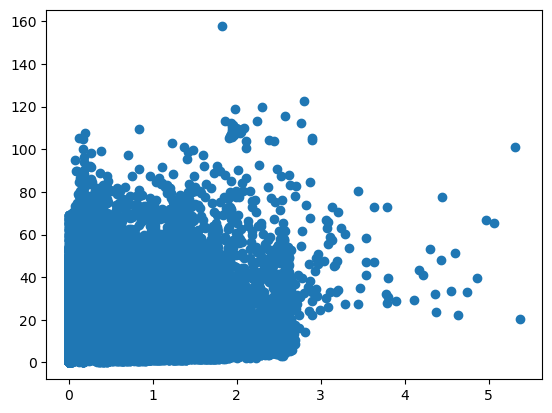

In [133]:
plt.scatter(X_train['0:30'], y_train)
plt.plot(X_train["0:30"].to_list(), y_pred, 'r')
plt.show()

In [134]:
model_fit = pd.DataFrame({'Actual Value': y_test, 'Predicted Value': y_pred})
model_fit

,Actual Value,Predicted Value
80788,0.000,1.491862e-15
4734,11.805,1.180500e+01
159202,9.623,9.623000e+00
249139,7.909,7.909000e+00
228905,7.696,7.696000e+00
...,...,...
206918,12.868,1.286800e+01
9592,8.938,8.938000e+00
151281,47.160,4.716000e+01
74121,5.886,5.886000e+00


In [138]:
print('R squared value of the model: {:.2f}'.format(model.score(X,y)*100))

R squared value of the model: 100.00


**Find out RMSE, MSE, MAE, MAPE**

In [79]:
rmse = mean_squared_error(y_test, y_pred, squared=False)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mape = mean_absolute_percentage_error(y_test, y_pred)

print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Absolute Percentage Error (MAPE): {mape}")

Root Mean Squared Error (RMSE): 1.1613759473475106e-14
Mean Squared Error (MSE): 1.3487940910773276e-28
Mean Absolute Error (MAE): 6.528333297046464e-15
Mean Absolute Percentage Error (MAPE): 0.3660884757261777
